## Importing libraries

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Importing Data

In [51]:
df = pd.read_csv('insurance.csv')

In [52]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data analysis

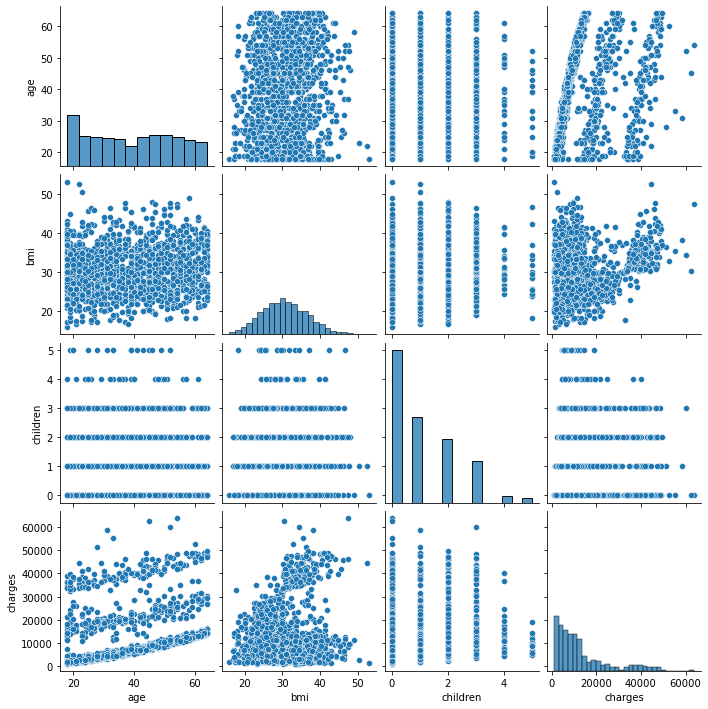

In [55]:
sns.pairplot(df)

In [56]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

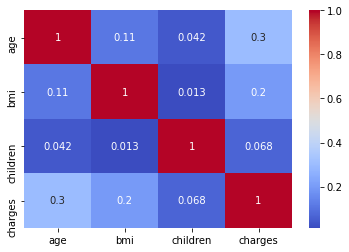

In [57]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [58]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='region', ylabel='count'>

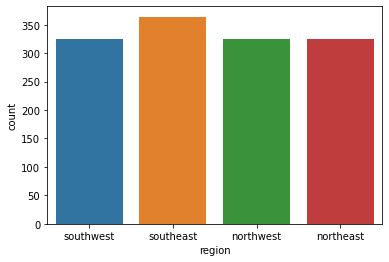

In [59]:
sns.countplot(x = 'region', data = df )

<AxesSubplot:xlabel='charges', ylabel='age'>

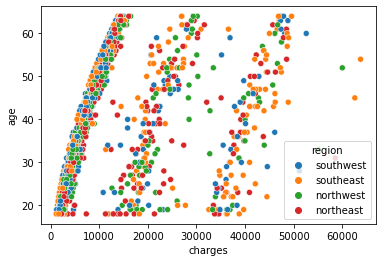

In [60]:
sns.scatterplot(x = 'charges', y = 'age', data = df, hue = 'region')

In [61]:
region = pd.get_dummies(df['region'], drop_first=True)
sex = pd.get_dummies(df['sex'], drop_first=True)
smoke = pd.get_dummies(df['smoker'], drop_first=True)

In [62]:
region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [63]:
sex.head()

,male
0,0
1,1
2,1
3,1
4,1


In [89]:
smoke.head()

,yes
0,1
1,0
2,0
3,0
4,0


In [64]:
df.drop(['region','sex'], axis = 1, inplace = True)
df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


In [65]:
df = pd.concat([df, region, sex, smoke], axis = 1)
df.head()

,age,bmi,children,smoker,charges,northwest,southeast,southwest,male,yes
0,19,27.900,0,yes,16884.92400,0,0,1,0,1
1,18,33.770,1,no,1725.55230,0,1,0,1,0
2,28,33.000,3,no,4449.46200,0,1,0,1,0
3,33,22.705,0,no,21984.47061,1,0,0,1,0
4,32,28.880,0,no,3866.85520,1,0,0,1,0


## Train test split

In [90]:
X = df[['age', 'bmi', 'children', 'northwest', 'southeast',
       'southwest', 'male', 'yes']]
y = df['charges']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting model

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lg = LinearRegression()

In [95]:
lg.fit(X_train, y_train)

LinearRegression()

In [96]:
pred = lg.predict(X_test)

## Result Evaluation

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [98]:
print(mean_absolute_error(y_test, pred), mean_squared_error(y_test, pred))

4145.450555627588 33780509.57479164


In [99]:
print(np.sqrt(mean_squared_error(y_test, pred)))

5812.100272258871


In [100]:
print(r2_score(y_test, pred))

0.7696118054369011


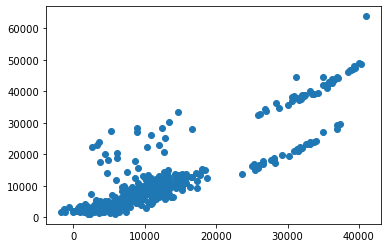

In [101]:
plt.scatter(pred, y_test)

In [102]:
diff = y_test - pred

(array([ 8., 20.,  5.,  9., 13., 16., 30., 56., 53., 56., 30., 22.,  9.,
         3., 10., 20., 15.,  4.,  2.,  2.,  2.,  3.,  2.,  3.,  1.,  1.,
         2.,  3.,  0.,  2.]),
 array([-10993.07731789,  -9865.4653147 ,  -8737.8533115 ,  -7610.24130831,
         -6482.62930512,  -5355.01730193,  -4227.40529874,  -3099.79329555,
         -1972.18129236,   -844.56928917,    283.04271402,   1410.65471721,
          2538.2667204 ,   3665.87872359,   4793.49072678,   5921.10272997,
          7048.71473316,   8176.32673636,   9303.93873955,  10431.55074274,
         11559.16274593,  12686.77474912,  13814.38675231,  14941.9987555 ,
         16069.61075869,  17197.22276188,  18324.83476507,  19452.44676826,
         20580.05877145,  21707.67077464,  22835.28277783]),
 <BarContainer object of 30 artists>)

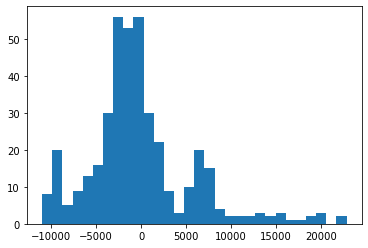

In [103]:
plt.hist(diff, bins = 30)

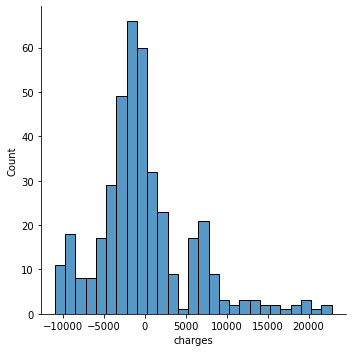

In [113]:
sns.displot(diff)

In [104]:
lg.coef_

array([  261.29692414,   348.90691516,   424.11912829,  -486.93461047,
        -970.96883857,  -926.32290791,   104.81182299, 23628.36722236])

In [105]:
X_train.columns

Index(['age', 'bmi', 'children', 'northwest', 'southeast', 'southwest', 'male',
       'yes'],
      dtype='object')

In [106]:
## checking the coefficients
cdf = pd.DataFrame(lg.coef_, X_train.columns, columns = ['Coefficients'] )
cdf

,Coefficients
age,261.296924
bmi,348.906915
children,424.119128
northwest,-486.934610
southeast,-970.968839
southwest,-926.322908
male,104.811823
yes,23628.367222


# Check for brand new entry

In [83]:
## from test data lets pic one entry from test data set

In [107]:
X_test.head()

,age,bmi,children,northwest,southeast,southwest,male,yes
764,45,25.175,2,0,0,0,0,0
887,36,30.020,0,1,0,0,0,0
890,64,26.885,0,1,0,0,0,1
1293,46,25.745,3,1,0,0,1,0
259,19,31.920,0,1,0,0,1,1


In [108]:
new = X_test.head(1)
new

,age,bmi,children,northwest,southeast,southwest,male,yes
764,45,25.175,2,0,0,0,0,0


In [109]:
new_entry = lg.predict(new)

In [110]:
## Predicted value
new_entry

array([9016.36752909])

In [111]:
## actual charges on insurence
df['charges'][764]

9095.06825